In [85]:
import gdown
import zipfile
import os
url = "https://drive.google.com/uc?id=1TbHce2SU-W_Fr2hMjN9E_WhC_1R9M182"
output = 'Penyisiha_Hology_Data_Mining.zip'
gdown.download(url, output, quiet=False)
with zipfile.ZipFile(output, 'r') as zip_ref:
  zip_ref.extractall()
os.remove(output)

Downloading...
From: https://drive.google.com/uc?id=1TbHce2SU-W_Fr2hMjN9E_WhC_1R9M182
To: /content/Penyisiha_Hology_Data_Mining.zip
100%|██████████| 10.2M/10.2M [00:00<00:00, 48.4MB/s]


In [86]:
import pandas as pd
import os
import numpy as np
from PIL import Image

In [114]:
df = pd.read_csv('/content/Penyisihan Hology Data Mining/train.csv')
df.head()

,id,jenis,warna
0,1,1,1
1,2,0,2
2,3,1,3
3,4,1,1
4,5,0,4


In [115]:
df.shape

(777, 3)

In [88]:
img = Image.open('/content/Penyisihan Hology Data Mining/train/103.jpg')
img.size

(200, 200)

In [89]:
image_folder = '/content/Penyisihan Hology Data Mining/train'
df = pd.read_csv('/content/Penyisihan Hology Data Mining/train.csv')

images = []
labels_jenis = []
labels_warna = []

for index, row in df.iterrows():
    img_id = row['id']
    jenis_label = row['jenis']  # 0: Kaos, 1: Hoodie
    warna_label = row['warna']  # 0: merah, 1: kuning, 2: biru, 3: hitam, 4: putih

    img_path = os.path.join(image_folder, f'{img_id}.jpg')

    try:
        img = Image.open(img_path)
        img = np.array(img) / 255.0

        images.append(img)
        labels_jenis.append(jenis_label)
        labels_warna.append(warna_label)
    except FileNotFoundError:
        print(f"Gambar {img_path} tidak ditemukan!")

Gambar /content/Penyisihan Hology Data Mining/train/18.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/29.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/31.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/54.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/57.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/65.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/67.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/73.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/80.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/89.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/118.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/127.jpg tidak ditemukan!
Gambar /content/Penyisihan Hology Data Mining/train/138.jpg tidak ditemukan!
Gambar /c

Banyak gambar gada?

In [120]:
count = 0
for filename in os.listdir(image_folder):
    count += 1
print(count)

777


In [90]:
X_train = np.array(images)
Y_train_jenis = np.array(labels_jenis)
Y_train_warna = np.array(labels_warna)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train_jenis, Y_val_jenis, Y_train_warna, Y_val_warna = train_test_split(
    X_train, Y_train_jenis, Y_train_warna, test_size=0.2, random_state=42
)

X_train.shape, X_val.shape, Y_train_jenis.shape, Y_val_jenis.shape, Y_train_warna.shape, Y_val_warna.shape

((571, 200, 200, 3), (143, 200, 200, 3), (571,), (143,), (571,), (143,))

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.layers import BatchNormalization

input_shape = (200, 200, 3)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)

output_jenis = Dense(1, activation='sigmoid', name='jenis_output')(x)
output_warna = Dense(5, activation='softmax', name='warna_output')(x)

model = Model(inputs=inputs, outputs=[output_jenis, output_warna])

model.compile(
    optimizer='adam',
    loss={
        'jenis_output': 'binary_crossentropy',
        'warna_output': 'sparse_categorical_crossentropy'
    },
    metrics={
        'jenis_output': 'accuracy',
        'warna_output': 'accuracy'
    }
)

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 200, 200, 32)   │            896 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_30          │ (None, 100, 100, 32)   │              0 │ conv2d_30[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 100, 100, 64)   │         18,496 │ max_pooling2d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_31          │ (None, 50, 50, 64)     │              0 │ conv2d_31[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 50, 50, 128)    │         73,856 │ max_pooling2d_31[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_32          │ (None, 25, 25, 128)    │              0 │ conv2d_32[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 80000)          │              0 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 256)            │     20,480,256 │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ jenis_output (Dense)      │ (None, 1)              │            257 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ warna_output (Dense)      │ (None, 5)              │          1,285 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,575,046 (78.49 MB)

 Trainable params: 20,575,046 (78.49 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(
    X_train,
    {'jenis_output': Y_train_jenis, 'warna_output': Y_train_warna},
    validation_data=(X_val, {'jenis_output': Y_val_jenis, 'warna_output': Y_val_warna}),
    epochs=20,
    batch_size=32
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 682ms/step - jenis_output_accuracy: 0.5269 - loss: 2.7724 - warna_output_accuracy: 0.4336 - val_jenis_output_accuracy: 0.7552 - val_loss: 0.8549 - val_warna_output_accuracy: 0.8112
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - jenis_output_accuracy: 0.7858 - loss: 0.7454 - warna_output_accuracy: 0.9144 - val_jenis_output_accuracy: 0.8182 - val_loss: 0.5295 - val_warna_output_accuracy: 0.9720
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - jenis_output_accuracy: 0.8296 - loss: 0.4670 - warna_output_accuracy: 0.9738 - val_jenis_output_accuracy: 0.7692 - val_loss: 0.9308 - val_warna_output_accuracy: 0.9510
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - jenis_output_accuracy: 0.8862 - loss: 0.3443 - warna_output_accuracy: 0.9734 - val_jenis_output_accuracy: 0.8322 - val_loss: 0.6472 - val_warna_output_accuracy: 0.9650
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - jenis_output_accuracy: 0.8775 - loss: 0.2664 - warna_output_a

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


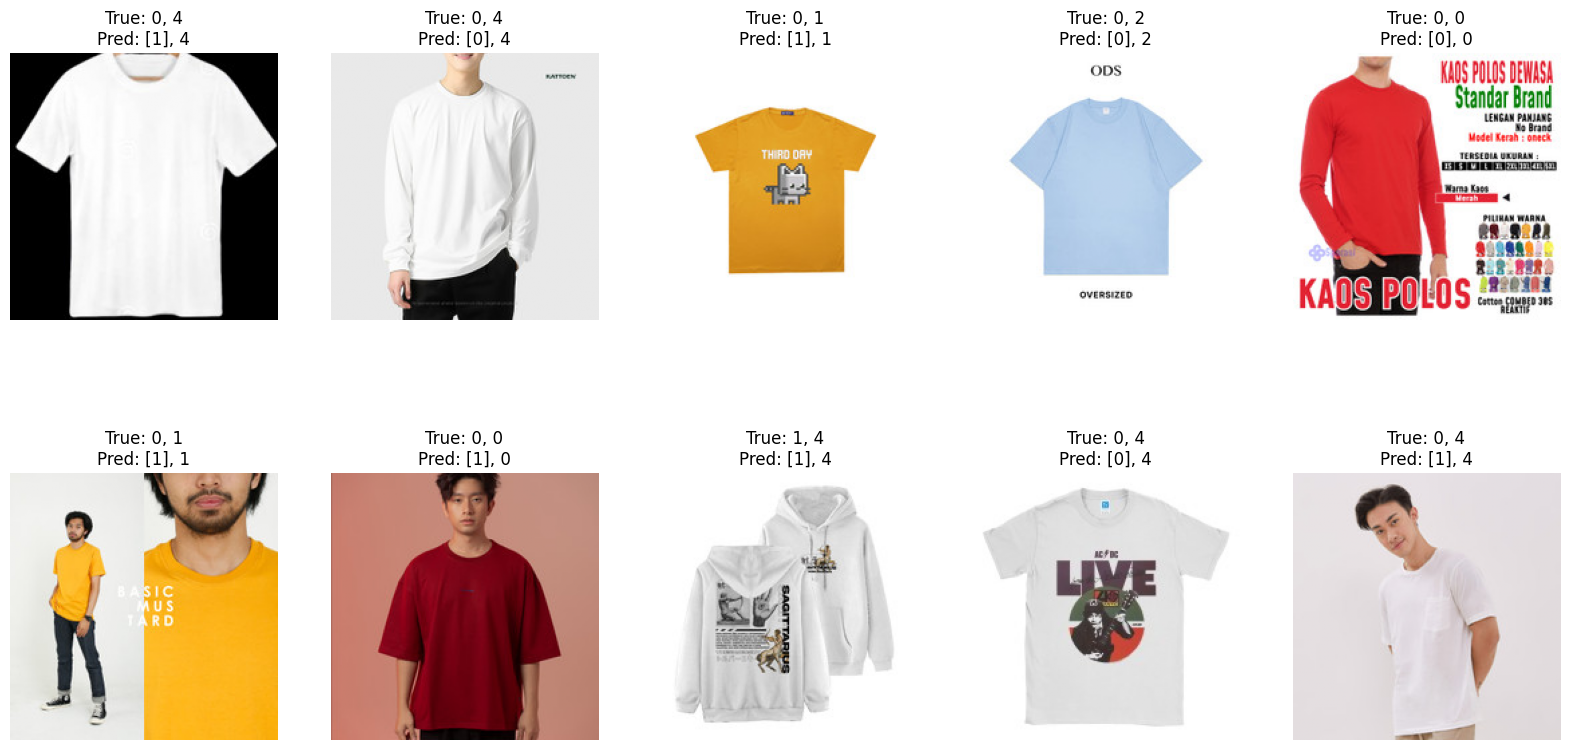

In [94]:
import matplotlib.pyplot as plt

predictions = model.predict(X_val)

predicted_jenis = np.round(predictions[0]).astype(int)
predicted_warna = np.argmax(predictions[1], axis=1)

def plot_images(images, true_labels_jenis, true_labels_warna, pred_labels_jenis, pred_labels_warna, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels_jenis[i]}, {true_labels_warna[i]}\nPred: {pred_labels_jenis[i]}, {pred_labels_warna[i]}")
        plt.axis('off')
    plt.show()

num_images = 10
sample_images = X_val[:num_images]
sample_true_labels_jenis = Y_val_jenis[:num_images]
sample_true_labels_warna = Y_val_warna[:num_images]
sample_pred_labels_jenis = predicted_jenis[:num_images]
sample_pred_labels_warna = predicted_warna[:num_images]

plot_images(sample_images, sample_true_labels_jenis, sample_true_labels_warna, sample_pred_labels_jenis, sample_pred_labels_warna)

In [97]:
# Ubah dimensi jika diperlukan
predicted_jenis = predicted_jenis.flatten()  # Atau predicted_jenis = predicted_jenis.numpy().flatten()
predicted_warna = predicted_warna.flatten()  # Atau predicted_warna = predicted_warna.numpy().flatten()


In [101]:
# actual vs prediction df
df = pd.DataFrame({
    'actual_jenis': Y_val_jenis,
    'actual_warna': Y_val_warna,
    'predicted_jenis': predicted_jenis.flatten(),
    'predicted_warna': predicted_warna.flatten()
})

df.to_csv('actual-vs-pred-base2.csv', index=False)

In [108]:
# save the model
model.save('base-model-2.h5')

In [111]:
from tensorflow.keras.models import load_model
model = load_model('/content/base-model-2.h5')

test_folder = 'Penyisihan Hology Data Mining/test'

sample_submission = pd.read_csv('Penyisihan Hology Data Mining/sample_submission.csv')

test_images = []
test_ids = []

for img_id in sample_submission['id']:
    img_path = os.path.join(test_folder, f'{img_id}.jpg')
    try:
        img = Image.open(img_path)
        img = img.resize((200, 200))
        img = np.array(img) / 255.0
        test_images.append(img)
        test_ids.append(img_id)
    except FileNotFoundError:
        print(f"Gambar {img_path} tidak ditemukan!")

Gambar Penyisihan Hology Data Mining/test/778.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/834.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/837.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/839.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/847.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/849.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/852.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/862.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/872.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/873.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/884.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/905.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/917.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/919.jpg tidak ditemukan!
Gambar Penyisihan Hology Data Mining/test/923.jpg tidak ditemu

lah test pisan?

In [112]:
X_test = np.array(test_images)

predictions = model.predict(X_test)

predicted_jenis = np.round(predictions[0]).astype(int).flatten()
predicted_warna = np.argmax(predictions[1], axis=1).flatten()

submission_df = pd.DataFrame({
    'id': test_ids,
    'jenis': predicted_jenis,
    'warna': predicted_warna
})

submission_path = 'Penyisihan Hology Data Mining/submission.csv'
submission_df.to_csv(submission_path, index=False)
print(f"Submission file saved to {submission_path}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step
Submission file saved to Penyisihan Hology Data Mining/submission.csv


In [113]:
df_sample = pd.read_csv('Penyisihan Hology Data Mining/sample_submission.csv')
df_submission = pd.read_csv('Penyisihan Hology Data Mining/submission.csv')

print(df_sample.shape)
print(df_submission.shape)

(334, 3)
(296, 3)
